In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')


In [6]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [18]:
targets = ['Low', 'Low-mid', 'Top-mid', 'Top' ]
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']

def prep_frame(df_year, year):
    df = pd.DataFrame()
    #loading 2015,2016,2017 data in one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year if 'Score' in x]] 
    
    #calcuting quartiles on data
    df['target'] = pd.qcut(df[df.columns[-1]], len(targets), labels = targets)
    df['target_n'] = pd.qcut(df[df.columns[-2]], len(targets), labels = range(len(targets)))
    
    # Append year and assign multi index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df

df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016))
df = df.append(prep_frame(df_2017, 2017))
df.head()   
        


,,GDP,Family,Life,Freedom,Generosity,Trust,Happiness Score,target,target_n
Country,Year,,,,,,,,,
Switzerland,2015,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,7.587,Top,3
Iceland,2015,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,7.561,Top,3
Denmark,2015,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,7.527,Top,3
Norway,2015,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,7.522,Top,3
Canada,2015,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,7.427,Top,3


#### Need of spearman 

Doesnot assume data is normally distributed. It varies between -1 and +1 with 0 implying no correlation. Can capture non-linear association as well. 

In [21]:
spearman_corrmatrix = df.corr(method = 'spearman')
spearman_corrmatrix

,GDP,Family,Life,Freedom,Generosity,Trust,Happiness Score
GDP,1.000000,0.584480,0.803493,0.374744,0.006568,0.214877,0.800252
Family,0.584480,1.000000,0.490872,0.454714,0.080144,0.098352,0.627502
Life,0.803493,0.490872,1.000000,0.382680,0.086622,0.175155,0.760712
Freedom,0.374744,0.454714,0.382680,1.000000,0.383047,0.458121,0.554569
Generosity,0.006568,0.080144,0.086622,0.383047,1.000000,0.231411,0.153457
Trust,0.214877,0.098352,0.175155,0.458121,0.231411,1.000000,0.305066
Happiness Score,0.800252,0.627502,0.760712,0.554569,0.153457,0.305066,1.000000


###### On left is continuous colormap and on right is BINNED map

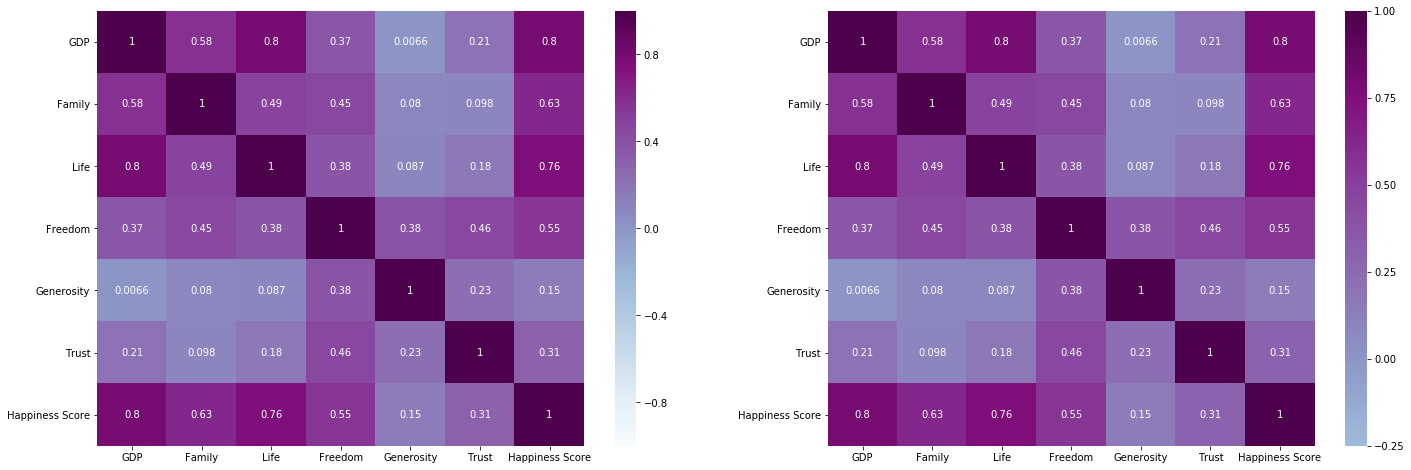

In [32]:
fig, ax = plt.subplots(ncols = 2, figsize = (24,8))

m = sns.heatmap(spearman_corrmatrix, annot =True, vmin = -1, vmax = 1, center = 0, ax = ax[0], cmap='BuPu')
m.set_yticklabels(df.columns,rotation=0)

n = sns.heatmap(spearman_corrmatrix, annot =True, vmin = -0.25, vmax = 1, center=0, ax = ax[1], cmap='BuPu')
n = n.set_yticklabels(df.columns,rotation=0)

It looks like GDP, Family, and Life Expectancy are strongly correlated with the Happiness score. 
Freedom correlates quite well with the Happiness score. However, Freedom correlates quite well with all data. 
Government Trust still has a mediocre correlation with the Happiness score.

### Seaborn Pairplot

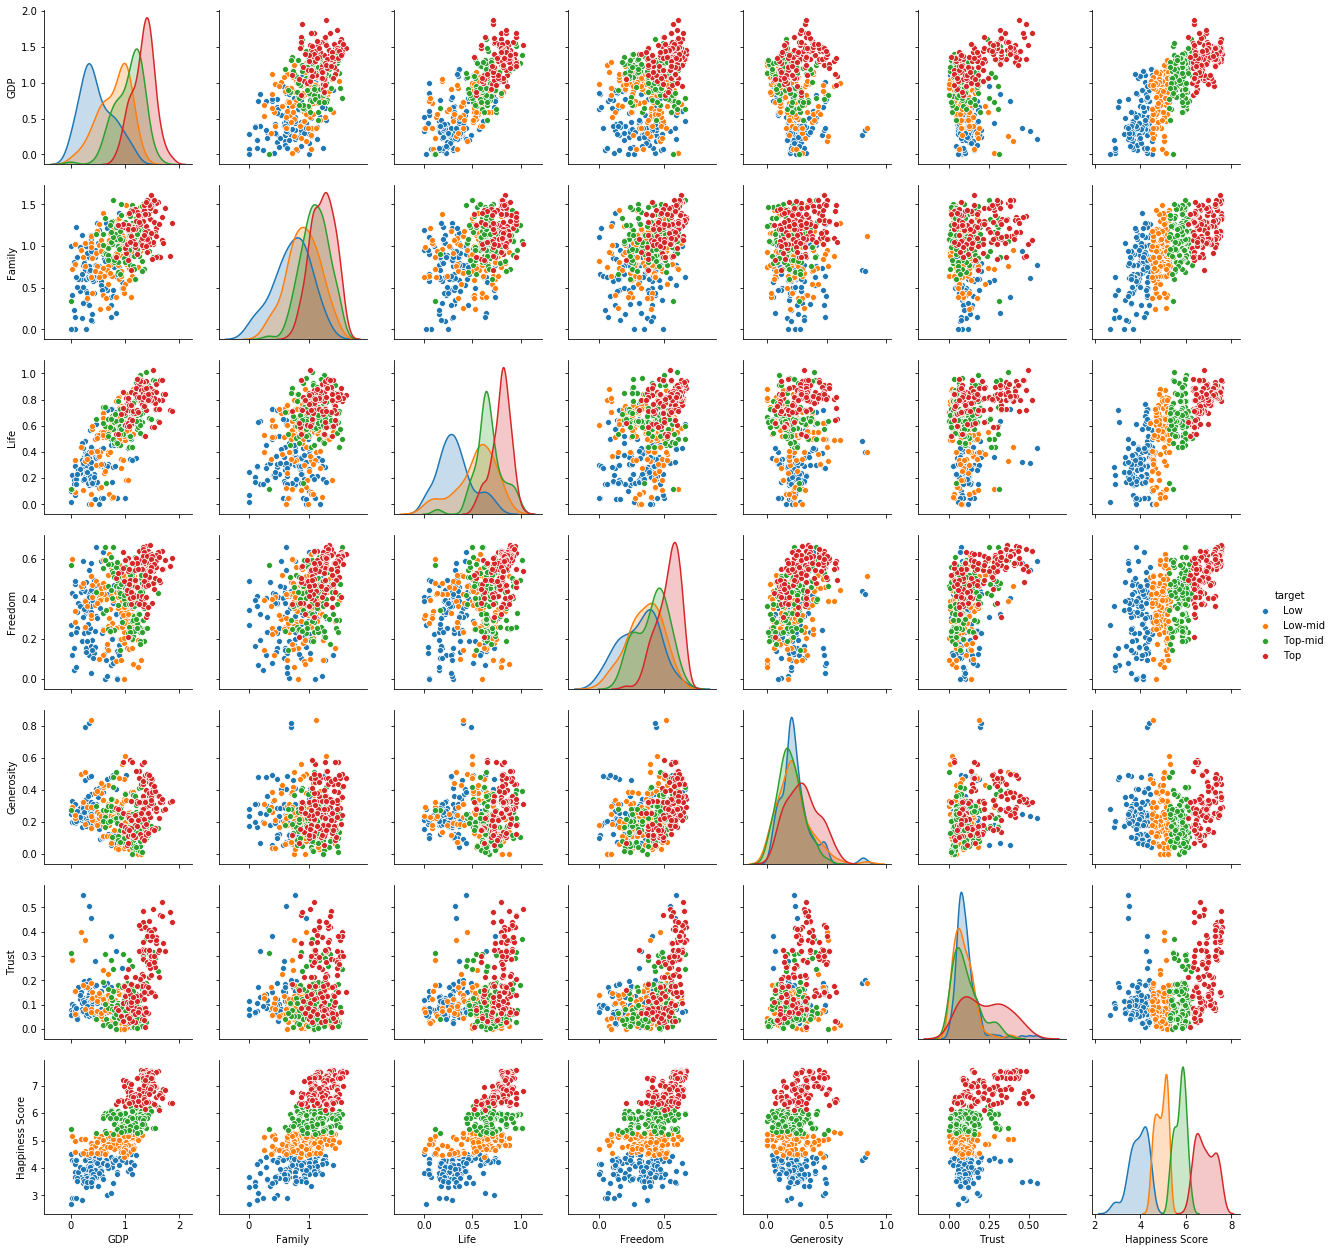

In [33]:
sns.pairplot(df.drop(['target_n'], axis = 1), hue = 'target')